<a href="https://colab.research.google.com/github/febse/econ2025-de/blob/main/09-Categorical-Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kategoriale Variablen

Open in Colab: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/febse/econ2025-de/blob/main/09-Categorical-Variables.ipynb)

## Simpson's paradox

Der Datensatz `berkley` enthält Informationen über Zulassungen an die University of California, Berkeley. Die Variablen sind:
- `Major`: Studienrichtung (A, B, C, etc.)
- `Gender`: Geschlecht (M, F)
- `Admission`: Zulassung (Accepted, Rejected)
- `is_rejected`: Eine Indikatorvariable, die angibt, ob eine Person abgelehnt wurde (1) oder nicht (0)


In [22]:
library(tidyverse)

## Simpson's paradox (1)

berkley <- read_csv(
  "https://waf.cs.illinois.edu/discovery/berkeley.csv"
  ) %>%
  mutate(
    is_rejected = ifelse(Admission == "Accepted", 0, 1),
  )

berkley %>% head()

Rows: 12763 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Major, Gender, Admission
dbl (1): Year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Year,Major,Gender,Admission,is_rejected
<dbl>,<chr>,<chr>,<chr>,<dbl>
1973,C,F,Rejected,1
1973,B,M,Accepted,0
1973,Other,F,Accepted,0
1973,Other,M,Accepted,0
1973,Other,M,Rejected,1
1973,Other,M,Rejected,1


In [23]:
berkley %>%
  group_by(Gender) %>%
    summarize(
        n = n(),
        n_rejected = sum(is_rejected),
        p_rejected = round(mean(is_rejected), 2)
    )

Gender,n,n_rejected,p_rejected
<chr>,<int>,<dbl>,<dbl>
F,4321,2827,0.65
M,8442,4704,0.56


In [24]:
admission_by_major_gender <- berkley %>%
  group_by(Major, Gender) %>%
    summarize(
        n = n(),
        n_rejected = sum(is_rejected),
        p_rejected = round(mean(is_rejected), 2)
    )
admission_by_major_gender

`summarise()` has grouped output by 'Major'. You can override using the
`.groups` argument.


Major,Gender,n,n_rejected,p_rejected
<chr>,<chr>,<int>,<dbl>,<dbl>
A,F,108,19,0.18
A,M,1138,313,0.28
B,F,25,8,0.32
B,M,560,207,0.37
C,F,593,392,0.66
C,M,325,205,0.63
D,F,375,244,0.65
D,M,417,279,0.67
E,F,393,299,0.76


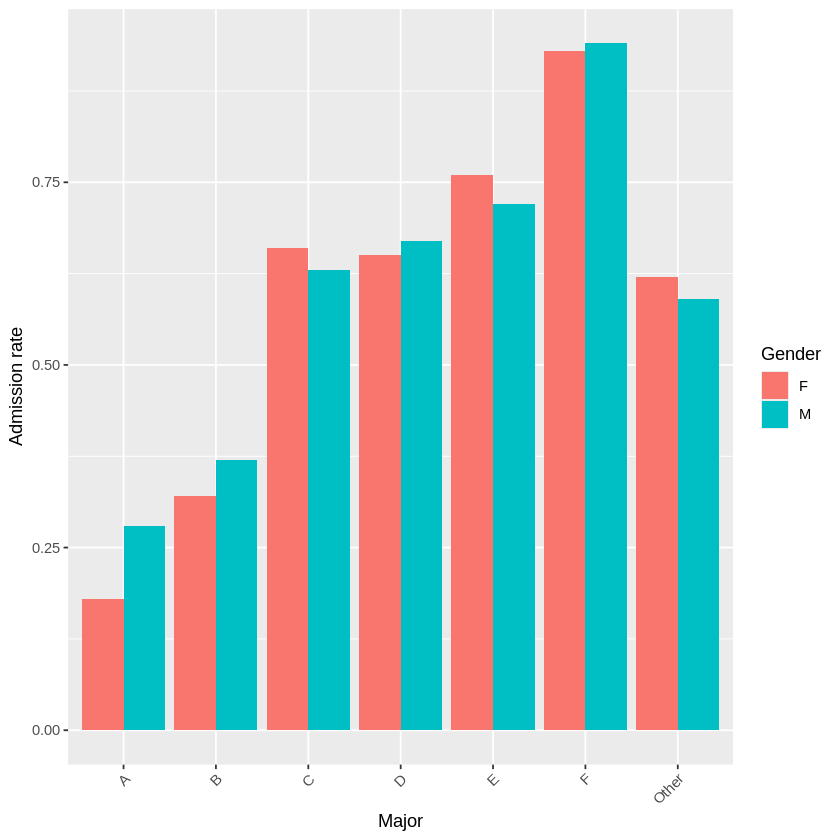

In [25]:
admission_by_major_gender %>%
  ggplot(aes(x = Major, y = p_rejected, fill=Gender)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(
      y = "Admission rate",
      x = "Major"
    ) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

## Regression with Categorical Variables



In [26]:
berkley %>% head()

Year,Major,Gender,Admission,is_rejected
<dbl>,<chr>,<chr>,<chr>,<dbl>
1973,C,F,Rejected,1
1973,B,M,Accepted,0
1973,Other,F,Accepted,0
1973,Other,M,Accepted,0
1973,Other,M,Rejected,1
1973,Other,M,Rejected,1


In [27]:
model_matrix <- model.matrix(lm(is_rejected ~ 0 + Gender, data = berkley))
model_matrix %>% head()

,GenderF,GenderM
1,1,0
2,0,1
3,1,0
4,0,1
5,0,1
6,0,1


In [28]:
berkey <- berkley %>%
  bind_cols(model_matrix)
berkey %>% head()

Year,Major,Gender,Admission,is_rejected,GenderF,GenderM
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1973,C,F,Rejected,1,1,0
1973,B,M,Accepted,0,0,1
1973,Other,F,Accepted,0,1,0
1973,Other,M,Accepted,0,0,1
1973,Other,M,Rejected,1,0,1
1973,Other,M,Rejected,1,0,1


Lassen Sie uns die Mittelwerte der Indikatorvariable für die Zulassung nach Geschlecht und Studienrichtung berechnen.

Das Modell ist wie folgt:

$$
\widehat{\text{is\_rejected}}_i = \hat{\beta}_0 + \hat{\beta}_{F} \text{GenderF}_i + \hat{\beta}_{M} \text{GenderM}_i  
$$

Eine alternative Art und Weise, das Modell zu schreiben, ist:

$$
\widehat{\text{is\_rejected}}_i = \hat{\beta}_0 + \hat{\beta}_{\text{Gender}[i]}
$$


In [29]:
lm(is_rejected ~ Gender, data = berkley) %>%
  summary()


Call:
lm(formula = is_rejected ~ Gender, data = berkley)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6542 -0.5572  0.3458  0.4428  0.4428 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.65425    0.00745   87.82   <2e-16 ***
GenderM     -0.09703    0.00916  -10.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4897 on 12761 degrees of freedom
Multiple R-squared:  0.008717,	Adjusted R-squared:  0.008639 
F-statistic: 112.2 on 1 and 12761 DF,  p-value: < 2.2e-16


In [30]:
lm(is_rejected ~ Gender + Major, data = berkley) %>%
  summary()


Call:
lm(formula = is_rejected ~ Gender + Major, data = berkley)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9444 -0.5946  0.3293  0.4054  0.7352 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.284330   0.015809  17.985  < 2e-16 ***
GenderM     -0.019574   0.009324  -2.099   0.0358 *  
MajorB       0.101929   0.023568   4.325 1.54e-05 ***
MajorC       0.372926   0.021104  17.671  < 2e-16 ***
MajorD       0.386329   0.021668  17.829  < 2e-16 ***
MajorE       0.470359   0.024203  19.434  < 2e-16 ***
MajorF       0.660069   0.022367  29.511  < 2e-16 ***
MajorOther   0.329810   0.014484  22.771  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4702 on 12755 degrees of freedom
Multiple R-squared:  0.08673,	Adjusted R-squared:  0.08623 
F-statistic:   173 on 7 and 12755 DF,  p-value: < 2.2e-16


## BIP pro Kopf und Staatsausgaben

Der Datensatz `gdp2019` enthält die BIP pro Kopf in aktuellen Preisen für 142 Länder im Jahr 2019. Darüber hinaus zeigt die Variable `spending` die Staatsausgaben in diesen Ländern als Anteil (in Prozent) des BIP.

-   `gdppc` (numeric): [BIP pro Kopf](https://www.imf.org/external/datamapper/NGDPDPC@WEO/OEMDC/ADVEC/WEOWORLD) in USD (aktuelle Preise)
-   `spending` (numeric): [Staatsausgaben als Anteil des BIP](https://www.imf.org/external/datamapper/exp@FPP/USA/FRA/JPN/GBR/SWE/ESP/ITA/ZAF/IND).

In [31]:
gdp2019 <- read_csv(
  "https://raw.githubusercontent.com/feb-sofia/econometrics-2023/main/data/gdpgov2019.csv"
  ) %>%
  filter(!is.na(spending))

gdp2019 %>% head()

Rows: 198 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): country
dbl (3): year, gdppc, spending

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


country,year,gdppc,spending
<chr>,<dbl>,<dbl>,<dbl>
Albania,2019,5345.058,29.15313
Algeria,2019,3953.402,41.78414
Angola,2019,2612.246,20.40298
Antigua and Barbuda,2019,17495.760,22.61898
Argentina,2019,10054.023,37.70266
Aruba,2019,30850.838,23.20869


1.  Zuerst möchten wir uns die Daten anschauen

$$
\text{gdppc}_i = \beta_0 + \beta_1 \text{spending}_i + e_i, \quad e_i \sim N(0, \sigma^2)
$$


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_smooth()`).”


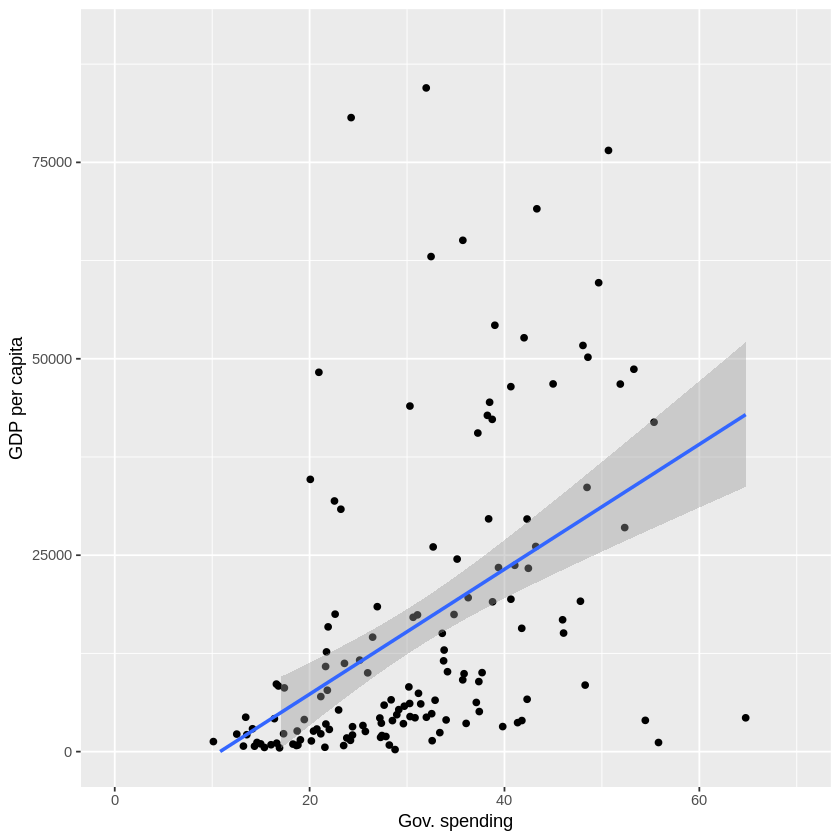

In [32]:
gdp2019 %>%
  ggplot(aes(x = spending, y = gdppc)) +
  geom_point() +
  geom_smooth(method = "lm") +
  labs(
    y = "GDP per capita",
    x = "Gov. spending"
  ) +
  lims(
    x = c(0, 70),
    y = c(0, 90000)
  )

In [33]:
# Estimate the model
summary(lm(gdppc ~ spending, data = gdp2019))


Call:
lm(formula = gdppc ~ spending, data = gdp2019)

Residuals:
   Min     1Q Median     3Q    Max 
-63798 -10356  -7064   3042  91817 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1219.7     4105.4   0.297    0.767    
spending       483.3      118.8   4.069 7.86e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19760 on 140 degrees of freedom
Multiple R-squared:  0.1057,	Adjusted R-squared:  0.09936 
F-statistic: 16.55 on 1 and 140 DF,  p-value: 7.861e-05


2.  Nun möchten wir die Daten in Kategorien einteilen. Wir verwenden die folgende Einteilung:

-   Low: if $\text{gdppc} \leq 1025$
-   Medium-low: if $1025 < \text{gdppc} \leq 3995$
-   Medium-high: if $3995 < \text{gdppc} \leq 12375$
-   High: if $12375 < \text{gdppc} \leq 30000$
-   Very high: if $\text{gdppc} > 30000$

In [34]:
gdp2019 <- gdp2019 %>%
  mutate(
    gdppc_gr = cut(
      gdppc,
      breaks = c(0, 1025, 3995, 12375, 30000, Inf),
      labels = c("Low", "Medium-low", "Medium-high", "High", "Very high"))
  )
table(gdp2019$gdppc_gr)


        Low  Medium-low Medium-high        High   Very high 
         13          36          40          26          27 

1. Wir schätzen zuerst ein lineares Modell mit den Kategorien als Dummy-Variablen:

$$
\text{gdppc}_i = \beta_0 + \beta_{\text{gdppc\_gr}[i]} + e_i, e_i \sim N(0, \sigma^2)
$$

Dabei ist:

$$
\beta_{\text{gdppc\_gr}[i]} = \begin{cases}
\beta_{\text{low}} & \text{falls } \text{gdppc\_gr}_i = \text{Low} \\
\beta_{\text{medium-low}} & \text{falls } \text{gdppc\_gr}_i = \text{Medium-low} \\
\beta_{\text{medium-high}} & \text{falls } \text{gdppc\_gr}_i = \text{Medium-high} \\
\beta_{\text{high}} & \text{falls } \text{gdppc\_gr}_i = \text{High} \\
\beta_{\text{very-high}} & \text{falls } \text{gdppc\_gr}_i = \text{Very high}
\end{cases}
$$

Eine andere Art und Weise, das Modell aufzuschreiben, ist:

$$
\text{gdppc}_i = \beta_0 + \beta_1 \text{low}_i + \beta_2 \text{medium-low}_i + \beta_3 \text{medium-high}_i + \beta_4 \text{high}_i + \beta_5 \text{very-high}_i + e_i, e_i \sim N(0, \sigma^2)
$$



In [35]:
fit <- lm(gdppc ~ spending + gdppc_gr, data = gdp2019)
summary(fit)


Call:
lm(formula = gdppc ~ spending + gdppc_gr, data = gdp2019)

Residuals:
   Min     1Q Median     3Q    Max 
-21965  -2318   -311   1100  60058 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -144.39    2593.15  -0.056    0.956    
spending               44.80      55.91   0.801    0.424    
gdppc_grMedium-low   1308.32    2811.85   0.465    0.642    
gdppc_grMedium-high  5835.94    2784.61   2.096    0.038 *  
gdppc_grHigh        18460.21    3051.44   6.050 1.33e-08 ***
gdppc_grVery high   51920.69    3082.84  16.842  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8518 on 136 degrees of freedom
Multiple R-squared:  0.8386,	Adjusted R-squared:  0.8327 
F-statistic: 141.4 on 5 and 136 DF,  p-value: < 2.2e-16


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


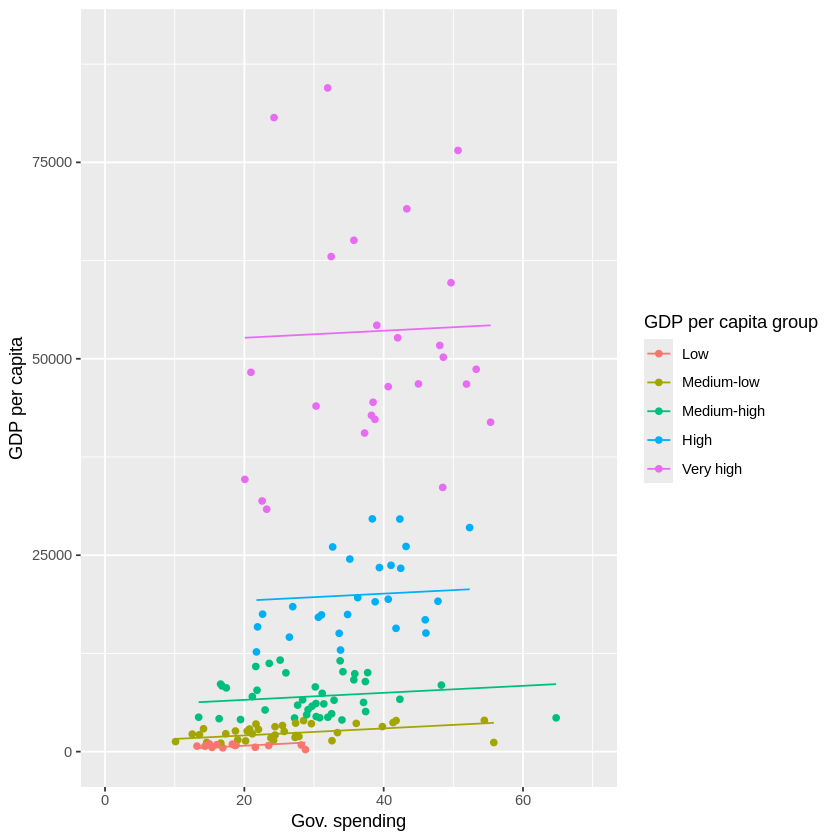

In [38]:
# prompt: calculate the predictions of fit and plot them

gdp2019$predictions <- predict(fit)

ggplot(gdp2019, aes(x = spending, y = gdppc, color = gdppc_gr)) +
  geom_point() +
  geom_line(aes(y = predictions)) +
  labs(
    y = "GDP per capita",
    x = "Gov. spending",
    color = "GDP per capita group"
  ) +
  lims(
    x = c(0, 70),
    y = c(0, 90000)
  )

In [ ]:
# Calculate the predictions of the model and plot them

